In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import scipy

from itertools import combinations

# Question 4.1

In [70]:
data = pd.read_csv("/Users/stephenandrews/Downloads/MIT Schoolwork/Spring 2025/6.3732/6373Pset4/data/Cooffending_data.csv")

nparr = data.to_numpy()

print(data)

         NoUnique            Name  Naissance SEXE     SeqE   dateInf   NCD1  \
0               1        Tatielly       1007    F  1085034  20051217   3530   
1               2       Oluwasayo       1828    F  1431379  20080423   1430   
2               4    ناصرعلي محمد       1889    M   167174  20080306   1430   
3               5              炜杰       1892    M  1179096  20080821   1420   
4              17           Avare       1897    M  1270690  20030430   1625   
...           ...             ...        ...  ...      ...       ...    ...   
1280454    670532         Liriane       2004    F  1112491  20090326   1330   
1280455    670533        Benzacky       2004    M    78081  20090629  21702   
1280456    670534      Piscitelli       2005    M   187904  20090316  21201   
1280457    670535  Alvaro Ramirez       2005    M   523837  20091018  21704   
1280458    670536            Kbir       2005    M  1632652  20081124  21101   

          NCD2 NCD3 NCD4    MUN ED1  Jeunes  Adulte

#### Part (a)

In [71]:
len(np.unique(nparr[:, 0]))

539593

#### Part (b)

In [72]:
len(np.unique(nparr[:, 1]))

539593

#### Part (c)

In [73]:
print(f"All years: {len(np.unique(nparr[:, 4]))}")

years = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]

for year in years:
    arr = np.where(nparr[:, -1] == year)
    # print(nparr[arr][:, 4])
    num = len(np.unique(nparr[arr][:, 4]))
    print(f"{year}: {num}")


All years: 1164836
2003: 110556
2004: 121374
2005: 172664
2006: 185840
2007: 196151
2008: 199288
2009: 178959
2010: 4


#### part (d)

In [74]:
unique_crimes = np.unique(nparr[:, 4])

unique_vals, counts = np.unique(nparr[:, 4], return_counts=True)

sorted_indices = np.argsort(-counts)

sorted_unique_vals = unique_vals[sorted_indices]
sorted_counts = counts[sorted_indices]

result = np.column_stack((sorted_unique_vals, sorted_counts))

In [75]:
muns = np.zeros((10, 1))

count = 0

for i in result[:10]:
    idx = np.where(nparr[:, 4] == i[0])[0][0]

    muns[count] = nparr[idx][10]
    count += 1

print(np.column_stack((sorted_unique_vals[:10], sorted_counts[:10], muns)))

[[27849 156 66023.0]
 [876159 102 12072.0]
 [445040 77 66023.0]
 [23526 60 75017.0]
 [60815 60 54048.0]
 [212285 57 37067.0]
 [754187 56 95032.0]
 [539385 52 66023.0]
 [23610 51 78005.0]
 [453024 46 66023.0]]


#### part (e)

In [76]:
data['SeqE'] = pd.to_numeric(data['SeqE'], errors='coerce')
data['NoUnique'] = pd.to_numeric(data['NoUnique'], errors='coerce')

# Drop rows with missing SeqE or NsoUnique
# data = data.dropna(subset=['SeqE', 'NoUnique'])

# Initialize undirected graph
G = nx.Graph()

# Group by SeqE (each event)
for _, group in data.groupby('SeqE'):
    participants = group['NoUnique'].unique()
    if len(participants) > 1:
        for u, v in combinations(participants, 2):
            if G.has_edge(u, v):
                G[u][v]['weight'] += 1
            else:
                G.add_edge(u, v, weight=1)

# Optional: Add isolated nodes (people with no co-offenders)
# for person in data['NoUnique'].unique():
#     if person not in G:
#         G.add_node(person)


In [79]:
print(f"Number of nodes: {G.number_of_nodes()}")

print(f"Number of solo offenders: {539593-121159}")

print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 121159
Number of solo offenders: 418434
Number of edges: 178413


### part (f)

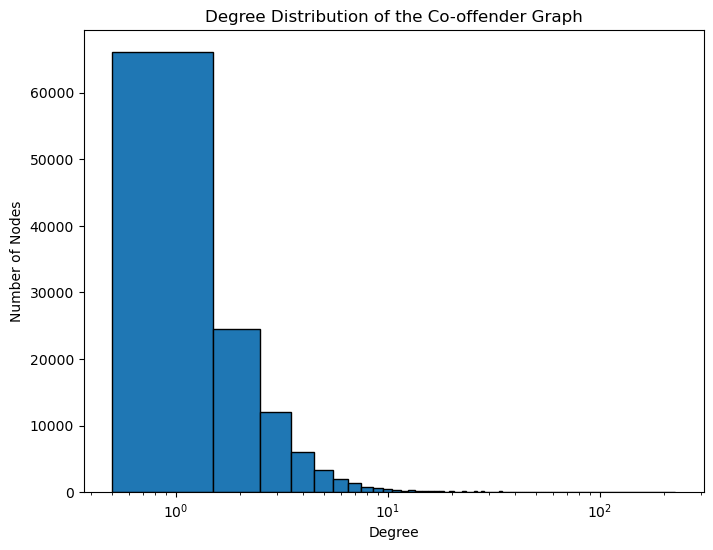

In [88]:
degree_sequence = [degree for node, degree in G.degree()]

# Plot the degree distribution as a histogram
plt.figure(figsize=(8, 6))
# Setting the bins to cover the full range of degrees; +2 ensures the last bin is included
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 2), 
         align='left', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution of the Co-offender Graph")
plt.xscale('log')
plt.savefig('deg_dist1')
plt.show()

#### part (g)

In [81]:
print(nx.number_connected_components(G))

36098


#### part (h)

In [85]:
largest_cc = max(nx.connected_components(G), key=len)

print(len(largest_cc))


19924


#### part(i)

Number of nodes in the largest connected component: 19924


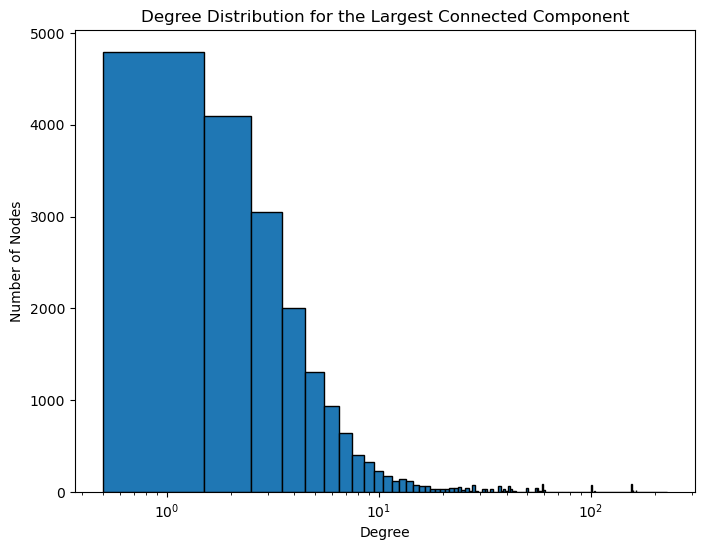

In [ ]:
G_largest = G.subgraph(largest_cc)

# Compute the degree for each node in the largest connected component
degree_sequence = [deg for _, deg in G_largest.degree()]

# Print basic info about the largest component
print("Number of nodes in the largest connected component:", len(G_largest.nodes()))

# Plot the degree distribution as a histogram
plt.figure(figsize=(8, 6))
# Define bins from the minimum to maximum degree, plus one to include the max value
bins = range(min(degree_sequence), max(degree_sequence) + 2)
plt.hist(degree_sequence, bins=bins, align='left', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution for the Largest Connected Component")
plt.xscale('log')
plt.savefig('deg_dist2')
plt.show()
